Họ tên: Phan Đặng Anh Khôi<br>
MSSV: 21127325<br>
Môn: Phân tích thống kê dữ liệu nhiều biến - Multivariate statistics analysis (MSA)

# Lab5: Canonical Correlation Analysis<br>
Nội dung: Thực hành CCA (Canonical Correlation Analysis) - Phân tích tương quan chính tắc<br>
1/ Phân tích tương quan chính tắc trên dữ liệu irish<br>
2/ Thực hiện theo chỉ dẫn và trả lời các request R1 -> R5<br>
3/ Trả lời các câu hỏi nghiên cứu (trong báo cáo)

### 1. Thư viện

In [13]:
# Thư viện sử dụng
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris # dữ liệu
from sklearn.cross_decomposition import CCA # Phân tích tương quan chính tắc
from sklearn.preprocessing import StandardScaler # chuẩn hóa

np.set_printoptions(suppress=True) # option: bỏ các giá trị scientific (1e3...)

### 2. Phân tích hệ số tương quan của cả tập dữ liệu
Tên: irish dataset<br>
Lấy từ thư viện <br>

<Axes: >

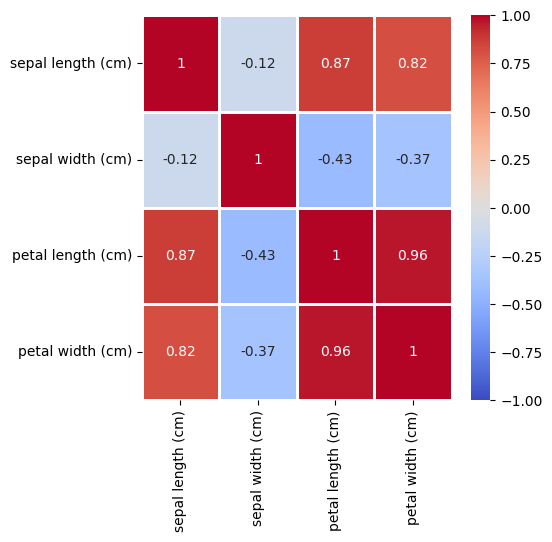

In [14]:
X,_ = load_iris(return_X_y=True, as_frame=True)
corr_coeff = X.corr() # DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)
# lấy ma trận hệ số tương quan sử dụng hstq Pearson
plt.figure(figsize = (5, 5))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)

### Request 01: Giải thích sự khác nhau về mối tương quan giữa chiều rộng / chiều dài của đài hoa với đặc điểm của lá hoa (cả rộng và dài) của loài hoa iris.

- Về hệ số tương quan (r): cho ta biết mối tương quan (hướng) và độ mạnh yếu của mối tương quan.
- r > 1 => mối tương quan đồng biến, nghĩa là biến này tăng thì biến kia cũng tăng.
- r < 1 =>  mối tương quan nghịch biến, nghĩa là biến này tăng thì biến kia giảm hoặc ngược lại.
- $ |r| $ càng tiến về 1 thì có nghĩa mối tương quan là mạnh, còn $ |r| $ tiến về 0 thì mối tương quan là yếu.

- Nhìn vào heatmap trên thì ta có thể thấy r giữa chiều dài đài hoa với 2 đặc điểm của lá hoa (chiều dài, chiều rộng) lần lượt là 0.87 và 0.82. Điều đó cho ta thấy mối tương quan này là mạnh và đồng biến. Khi chiều dài đài hoa tăng thì cả 2 chiều dài và chiều rộng lá hoa có xu hướng tăng mạnh.
- Còn r giữa chiều rộng đài hoa với 2 đặc điểm của lá hoa (chiều dài, chiều rộng) lần lượt là -0.43 và -0.37. Điều đó cho ta thấy mối tương quan này là trung bình yếu và nghịch biến. Khi chiều rộng đài hoa tăng thì cả 2 chiều dài và chiều rộng lá hoa có xu hướng giảm với mức giảm là trung bình yếu.

### 3. Thực hiện CCA

In [15]:
# print(X.columns)
'''
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
'''

# Chia tập dữ liệu thành 2 tập con X1, X2.
X1 = X.iloc[:, :2] # lấy ra 2 cột đầu tiên => X1 gồm 2 biến (dài và rộng) liên quan đến đài hoa
X2 = X.iloc[:, 2:] # lấy ra 2 cột cuối => X2 gồm 2 biến (dài và rộng) liên quan đến lá hoa

scaler = StandardScaler()
# Thực hiện chuẩn hóa dữ liệu, đưa trung bình các cột về 0 và độ lệch chuẩn về 1
X1_sc = scaler.fit_transform(X1)
X2_sc = scaler.fit_transform(X2)
# print(X1_sc.mean(), X2_sc.mean())
# print(X1_sc.std(), X2_sc.std())
'''
-5.684341886080802e-16 -3.789561257387201e-16
1.0 1.0
'''

n_comp = 2
# Khai báo phân tích tương quan chính tắc với số biến = 2
cca = CCA(scale=False, n_components=n_comp)
cca.fit(X1_sc, X2_sc)
X1_c, X2_c = cca.transform(X1_sc, X2_sc) # Biến đổi 2 tập dữ liệu đã chuẩn hóa để lấy các (2) biến chính tắc
U, V = X1_c, X2_c

### Gọi X1_c và X2_c lần lượt là U và V, là 2 biến chính tắc
- Định nghĩa: Biến chính tắc (canonical variate) hình thành từ tổ hợp tuyến tính của từ 2 biến (variable/variate) trở lên, cụ thể với U và V như sau:
$$ U = a1 * U1 + a2 * U2 $$
$$ V = b1 * V1 + b2 * V2 $$
- trong đó, U1 và U2 chính là 2 cột sepal length và sepal width.
- V1 và V2 chính là 2 cột petal length và petal width.
- (a1, a2) hoặc (b1, b2) là vector trọng số ứng với vector riêng có giá trị riêng lớn nhất của ma trận R hình thành từ tích của 4 ma trận hiệp phương sai (covariance) (cách tính ma trận R sẽ được trình bày sau)

### Request 02: Lý do scale (chuẩn hóa) dữ liệu quan trọng?

- Việc chuẩn hóa dữ liệu sẽ đảm bảo tính đồng nhất của dữ liệu. Đồng nhất ở đây nghĩa là khi tập dữ liệu được lấy với các đơn vị khác nhau. VD có 2 cột: V1 đo từ 1m -> 2m. V2 thì 10miles -> 100miles.
- Khác biệt đó gây ảnh hưởng đến các thuật toán trong ML đòi hỏi phải tính độ lớn khoảng cách. Vì nếu không chuẩn hóa thì biến V2 sẽ lấn át V1 => Biến V2 sẽ đánh vô trọng số nhiều hơn là biến V1. Điều này cũng sẽ gây ảnh hưởng khi ta thực hiện Phân tích tương quan chính tắc, nhưng vì dữ liệu của chúng ta cả 4 biến đều là cm nên cũng không có ảnh hưởng.

### 4. Kiểm tra tính phụ thuộc giữa U và V bằng cách tính hệ số tương quan giữa cặp U, V

[0.9409689969606324, 0.1239368812073951]


<BarContainer object of 2 artists>

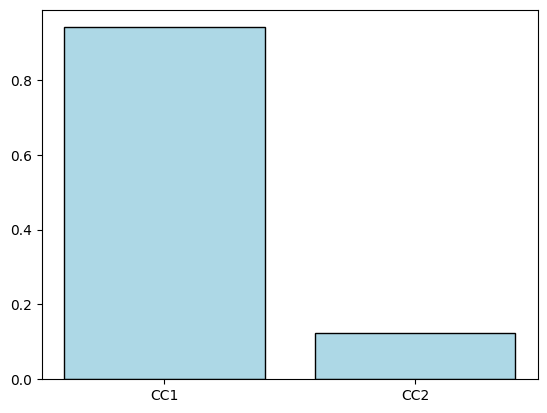

In [16]:
comp_corr = [np.corrcoef(U[:, i], V[:, i])[0][1] for i in range(n_comp)]
print(comp_corr)
plt.bar(['CC1', 'CC2'], comp_corr, color='lightblue', width = 0.8, edgecolor='k')

### Tìm mối quan hệ giữa trị riêng (của tích các ma trận) và hệ số tương quan

- Ta có U = [U1, U2] là các biến chuẩn hóa và V = [V1, V2] cũng là các biến chuẩn hóa.
- Giả sử K = [U, V] và ma trận covariance Cov(K) như sau: <br>
$ \sum{U_1V_1} | \sum{U_1V_2} $ <br>
$ \sum{U_2V_1} | \sum{U_2V_2} $ <br>
- U1 = sepal length; U2 = sepal width. (đã chuẩn hóa)
- V1 = petal length; V2 = petal width. (đã chuẩn hóa)

In [17]:
# lấy các cột dữ liệu đã chuẩn hóa
U1, U2 = X1_sc[:, 0], X1_sc[:, 1]
V1, V2 = X2_sc[:, 0], X2_sc[:, 1]

In [18]:
# Tính toán các ma trận cần thiết
# Tìm ma trận cov(U1, U2)
cov_mat_U1U2 = np.cov(U1, U2) # p11

# Tìm ma trận cov(V1, V2)
cov_mat_V1V2 = np.cov(V1, V2) # p22

# Tìm ma trận Rxy = Cov(K)
cov_U1V1 = np.cov(U1, V1)[0][1]
cov_U1V2 = np.cov(U1, V2)[0][1]
cov_U2V1 = np.cov(U2, V1)[0][1]
cov_U2V2 = np.cov(U2, V2)[0][1]
cov_K = np.array(
    [[cov_U1V1, cov_U1V2],
    [cov_U2V1, cov_U2V2]]) # p12

cov_K_T = cov_K.T # p21

### [Ref 1] (Example 10.1) trang 543
$ p_1^{*2}, p_2^{*2} $
là trị riêng của tích các ma trận: <br>
$$ p_{11}^{\frac{-1}{2}} * p_{12} * p_{22}^{-1} * p_{21} * p_{11}^{\frac{-1}{2}} = R_{UY} $$
Và $ \sqrt{p_1^{*2}}, \sqrt{p_2^{*2}} = p_1^*, p_2^* $ chính là hệ số tương quan của cặp biến thứ nhất và thứ hai

In [19]:
def sqrt_inv(matrix):
    # Phân rã SVD của ma trận
    U, S, Vt = np.linalg.svd(matrix)

    # Nghịch đảo căn bậc hai của ma trận đường chéo S
    S_inv_sqrt = np.diag(1 / np.sqrt(S))

    # Tính ma trận mũ -1/2
    matrix_sqrt_inv = np.dot(np.dot(U, S_inv_sqrt), Vt)
    return matrix_sqrt_inv

inv_sqrt_p11 = sqrt_inv(cov_mat_U1U2)
inv_p22 = np.linalg.inv(cov_mat_V1V2)

R_UY = inv_sqrt_p11.dot(cov_K).dot(inv_p22).dot(cov_K_T).dot(inv_sqrt_p11)

eigenvalues, eigenvectors = np.linalg.eig(R_UY)
print(np.sqrt(eigenvalues))

[0.940969   0.12393688]


### [Ref 1] (10-11) trang 545
- Để giảm bớt gánh nặng tính toán, người ta lấy hệ số tương quan từ phương trình vector riêng sau:
$$ M * a = \sum_{11}^{-1} * \sum_{12} * \sum_{22}^{-1} * \sum_{21} * a = p^{*2} * a $$
$$ N * b = \sum_{22}^{-1} * \sum_{21} * \sum_{11}^{-1} * \sum_{12} * b = p^{*2} * b $$
- Trong đó a hay b là vector riêng ứng với trị riêng $p^{*2}$ lớn nhất của ma trận M hay N. Và $\sqrt{p^{*2}} = p^*$ là hệ số tương quan giữa U và V.

In [20]:
inv_sigma_11 = np.linalg.inv(cov_mat_U1U2)
inv_sigma_22 = np.linalg.inv(cov_mat_V1V2)

M = inv_sigma_11.dot(cov_K).dot(inv_sigma_22).dot(cov_K_T)
N = inv_sigma_22.dot(cov_K_T).dot(inv_sigma_11).dot(cov_K)

eigenvalues_M, _ = np.linalg.eig(M)
eigenvalues_N, _ = np.linalg.eig(N)

print(np.sqrt(eigenvalues_M))
print(np.sqrt(eigenvalues_N))

[0.940969   0.12393688]
[0.940969   0.12393688]


=> KẾT LUẬN: Căn bậc hai trị riêng của tích 4 ma trận hiệp phương sai được hình thành từ các biến (đã chuẩn hóa) của cặp biến chính tắc là các hệ số tương quan giữa cặp đó.

### Request 03: So sánh hstq của cặp biến chính tắc thứ nhất và hstq của cặp biến chính tắc thứ hai. Cặp nào nên được dùng để phân tích?

- Sau khi phân tích thì ta thấy r của cặp thứ nhất là 0.94, cao hơn so với r của cặp thứ hai là 0.12.<br>
- Khi thực hiện CCA, ta muốn xem xét r của cặp thứ nhất hay cặp thứ hai lớn hơn để lấy thông tin về mối liên hệ giữa 2 tập dữ liệu nhiều nhất có thể.<br>
=> Vậy ta chọn r của cặp thứ nhất vì nó thể hiện có mối tương quan mạnh giữa 2 tập dữ liệu.

### 5. Phân tích hệ số tải liên quan đến từng biến chuẩn

In [21]:
cca.x_loadings_ # hệ số tải cho biến chuẩn X1 (đài hoa)

array([[ 0.89224641,  0.3880084 ],
       [-0.45786609,  0.92165584]])

In [22]:
cca.y_loadings_  # hệ số tải cho biến chuẩn X2 (lá hoa)

array([[1.5732248 , 0.33270605],
       [1.45353265, 0.94303059]])

- Hệ số tải cho biến chuẩn (Canonical loadings) cho ta biết mối tương quan giữa các biến gốc (original variables) và các biến chuẩn (canonical variates).
- Theo https://stats.stackexchange.com/questions/551443/cannot-manually-reproduce-cca-loadings, hệ số tải trong CCA có các "danh pháp" không nhất quán, vì vậy khó mà phân biệt được.

In [23]:
# Ta có phép chiếu cca.x_rotations_ để biểu diễn X1_c
X1_c_hand = np.matmul(X1_sc, cca.x_rotations_)
print(np.all(X1_c_hand - X1_c < 1e-6))
# tương tự với X2_c
X2_c_hand = np.matmul(X2_sc, cca.y_rotations_)
print(np.all(X2_c_hand - X2_c < 1e-6))

True
True


### Request 04: Rút ra kết luận từ loadings

- Khi thực hiện lấy hệ số tải cho X1, tức x_loadings_, ở cặp đầu tiên: [0.89, 0.38]. Nghĩa là "cặp" đầu có ảnh hưởng theo chiều hướng tích cực và mạnh đến biến chính tắc đầu tiên trong tập dữ liệu X1.<br>
- Cặp thứ hai [-0.45, 0.92] thì cũng kha khá ảnh hưởng đến biến chính tắc thứ hai trong tập dữ liệu X1.

- Còn hệ số tải cho X2, y_loadings.
- Cả 2 cặp đều cho thấy có mối tương quan mạnh, nghĩa là cả 2 cặp đều có ảnh hưởng tích cực và mạnh đến các biến chính tắc tương ứng trong tập dữ liệu X2.

### 6. Phân tích các hệ số (coefficients) trong CCA

                  petal length (cm) petal width (cm)
sepal length (cm)              1.60            -0.31
sepal width (cm)               1.77             0.28


<Axes: xlabel='None'>

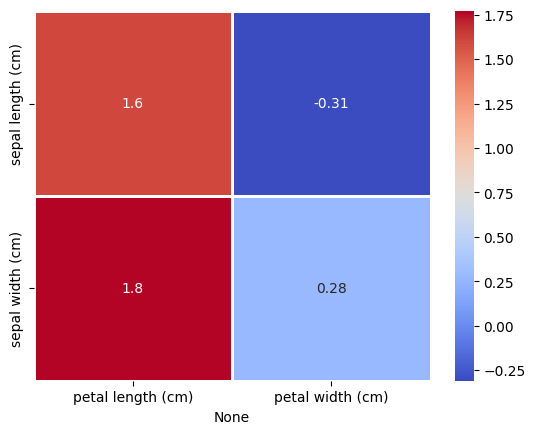

In [25]:
coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [X2.columns])
coef_df.index = X1.columns

print(coef_df)
sns.heatmap(coef_df, cmap='coolwarm', annot=True, linewidths=1)


### Request 05: So sánh heatmap ở bước 2 và bước 6

- Heatmap bước 6 này giống với 1 góc phần tư bên trên phải của heatmap bước 2. Nhưng có điều là r giữa chiều rộng của đài hoa so và chiều rộng lá hoa có chiều hướng dương thay vì âm như ở bước 2 và có giá trị là trung bình yếu (0.28).
- Trong khi ma trận hệ số tương quan ở bước 2 tập trung vào sự tương quan giữa các cặp biến thì ma trận hệ số chính tắc ở bước 6 tập trung vào mối quan hệ giữa các biến với các biến chính tắc.
- Thực tế thì CCA muốn tìm ra 2 tổ hợp tuyến tính sao cho sự tương quan giữa 2 tổ hợp này là lớn nhất nên có sự khác biệt với heatmap ở bước 2.